In [2]:
import os
import shutil
from sklearn.model_selection import train_test_split

original_dataset_dir = "/kaggle/input/tomatoleaf/tomato/train"
base_dir = "/kaggle/working/tomato_split"

train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")


os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)


for category in os.listdir(original_dataset_dir):
    category_path = os.path.join(original_dataset_dir, category)
    images = os.listdir(category_path)

    
    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)

    
    for img in train_images:
        src = os.path.join(category_path, img)
        dst = os.path.join(train_dir, category, img)
        shutil.copy2(src, dst)

    
    for img in test_images:
        src = os.path.join(category_path, img)
        dst = os.path.join(test_dir, category, img)
        shutil.copy2(src, dst)

print("yes train  test ")


yes train  test 


In [3]:
train = "/kaggle/working/tomato_split/train"
test = "/kaggle/working/tomato_split/test"
validation = "/kaggle/input/tomatoleaf/tomato/val"


In [4]:
def count_image(directory) :  
    categories = os.listdir(directory)
    category_count = {
        category : len(os.listdir(os.path.join(category , directory))) for category in categories
    }
    return category_count 
    
    

In [5]:
train_count = count_image(train)
validation_count = count_image(validation)
test_count = count_image(test)
print(f"Train sample count : {train_count}\n")
print("-------------------------------------")
print(f"the test count : {test_count} \n")
print("----------------------------------------")
print(f"the validation count : {validation_count}")


Train sample count : {'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 10, 'Tomato___Spider_mites Two-spotted_spider_mite': 10, 'Tomato___Septoria_leaf_spot': 10, 'Tomato___Leaf_Mold': 10, 'Tomato___Bacterial_spot': 10, 'Tomato___Late_blight': 10, 'Tomato___Target_Spot': 10, 'Tomato___Tomato_mosaic_virus': 10, 'Tomato___Early_blight': 10, 'Tomato___healthy': 10}

-------------------------------------
the test count : {'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 10, 'Tomato___Spider_mites Two-spotted_spider_mite': 10, 'Tomato___Septoria_leaf_spot': 10, 'Tomato___Leaf_Mold': 10, 'Tomato___Bacterial_spot': 10, 'Tomato___Late_blight': 10, 'Tomato___Target_Spot': 10, 'Tomato___Tomato_mosaic_virus': 10, 'Tomato___Early_blight': 10, 'Tomato___healthy': 10} 

----------------------------------------
the validation count : {'Tomato___Late_blight': 10, 'Tomato___healthy': 10, 'Tomato___Early_blight': 10, 'Tomato___Septoria_leaf_spot': 10, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 10, 'Tomato___Bacterial_

In [6]:
df_train = pd.DataFrame(list(train_count.items()), columns=['Vegetable', 'Train Count'])

df_test  = pd.DataFrame(list(test_count.items()), columns=['Vegetable', 'Test Count'])
df_validation = pd.DataFrame(list(validation_count.items()) , columns  = ['Vegetable', 'Validation Count'] )

In [7]:
df = pd.merge(df_train, df_test, on='Vegetable')
df = pd.merge(df , df_validation ,on='Vegetable' )
df 

,Vegetable,Train Count,Test Count,Validation Count
0,Tomato___Tomato_Yellow_Leaf_Curl_Virus,10,10,10
1,Tomato___Spider_mites Two-spotted_spider_mite,10,10,10
2,Tomato___Septoria_leaf_spot,10,10,10
3,Tomato___Leaf_Mold,10,10,10
4,Tomato___Bacterial_spot,10,10,10
5,Tomato___Late_blight,10,10,10
6,Tomato___Target_Spot,10,10,10
7,Tomato___Tomato_mosaic_virus,10,10,10
8,Tomato___Early_blight,10,10,10
9,Tomato___healthy,10,10,10


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,           
    rotation_range=10,        
    width_shift_range=0.1,    
    height_shift_range=0.1,   
    shear_range=0.1,          
    zoom_range=0.1,           
    horizontal_flip=True,     
    validation_split=0.2      
)
val_datagen = ImageDataGenerator(
    rescale=1./255,  
    validation_split=0.2
)

train_ds = train_datagen.flow_from_directory(
    "/kaggle/input/tomatoleaf/tomato/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="training",  
    seed=42,
    shuffle=True
)

val_ds = val_datagen.flow_from_directory(
    "/kaggle/input/tomatoleaf/tomato/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="validation",  
    seed=42
)


2025-04-30 11:50:46.122662: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746013846.424959      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746013846.513867      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 8000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()


2025-04-30 11:51:11.786035: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      44,302,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,401,226 (169.38 MB)

 Trainable params: 44,401,226 (169.38 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=[early_stop]  
)


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 628s 2s/step - accuracy: 0.2293 - loss: 2.3355 - val_accuracy: 0.4545 - val_loss: 1.8215
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 617s 2s/step - accuracy: 0.6689 - loss: 0.9907 - val_accuracy: 0.5150 - val_loss: 2.1652
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 613s 2s/step - accuracy: 0.7419 - loss: 0.7216 - val_accuracy: 0.7955 - val_loss: 0.5854
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 612s 2s/step - accuracy: 0.7821 - loss: 0.6150 - val_accuracy: 0.7730 - val_loss: 0.8158
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 619s 2s/step - accuracy: 0.8189 - loss: 0.5208 - val_accuracy: 0.7675 - val_loss: 0.7671
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 614s 2s/step - accuracy: 0.8418 - loss: 0.4485 - val_accuracy: 0.6900 - val_loss: 1.5644
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 615s 2s/step - accuracy: 0.8440 - loss: 0.4368 - val_accuracy: 0.7795 - val_loss: 0.9008
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 611s 2s/step - accuracy: 0.8674 - loss: 0.3805 - val_accu

In [12]:
# Evaluate on training set
train_loss, train_acc = model.evaluate(train_ds)
print(f"Train Accuracy: {train_acc * 100:.2f}%")

# Evaluate on validation set
val_loss, val_acc = model.evaluate(val_ds)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")


250/250 ━━━━━━━━━━━━━━━━━━━━ 243s 970ms/step - accuracy: 0.7950 - loss: 0.5712
Train Accuracy: 78.86%
63/63 ━━━━━━━━━━━━━━━━━━━━ 38s 606ms/step - accuracy: 0.7966 - loss: 0.6119
Validation Accuracy: 79.55%


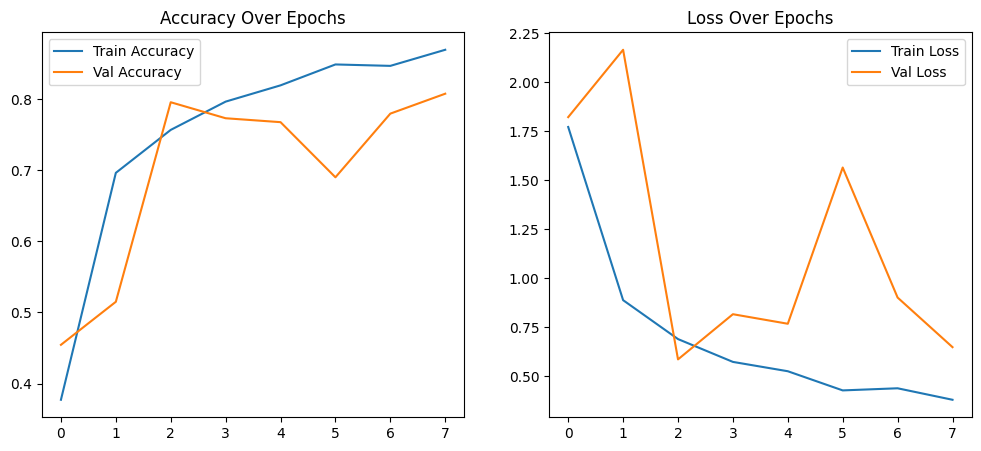

In [13]:
import matplotlib.pyplot as plt

# Extract values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Train Accuracy")
plt.plot(epochs_range, val_acc, label="Val Accuracy")
plt.legend()
plt.title("Accuracy Over Epochs")

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Train Loss")
plt.plot(epochs_range, val_loss, label="Val Loss")
plt.legend()
plt.title("Loss Over Epochs")

plt.show()


In [ ]:
import numpy as np

# Get true labels and predictions
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)  # Get predictions
    y_pred.extend(np.argmax(preds, axis=1))  # Convert to class index
    y_true.extend(np.argmax(labels, axis=1))  # Directly convert one-hot to index

y_true = np.array(y_true)
y_pred = np.array(y_pred)


In [16]:
from sklearn.metrics import classification_report

# Get class names from dataset
class_names = list(val_ds.class_indices.keys())

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_names))


                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.81      0.90      0.85     20367
                        Tomato___Early_blight       0.73      0.62      0.67     20356
                         Tomato___Late_blight       0.90      0.65      0.76     20370
                           Tomato___Leaf_Mold       0.86      0.84      0.85     20371
                  Tomato___Septoria_leaf_spot       0.77      0.71      0.74     20364
Tomato___Spider_mites Two-spotted_spider_mite       0.83      0.71      0.76     20376
                         Tomato___Target_Spot       0.74      0.68      0.71     20373
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.81      0.93      0.86     20377
                 Tomato___Tomato_mosaic_virus       0.87      0.94      0.90     20372
                             Tomato___healthy       0.70      0.98      0.81     20354

                                     accu

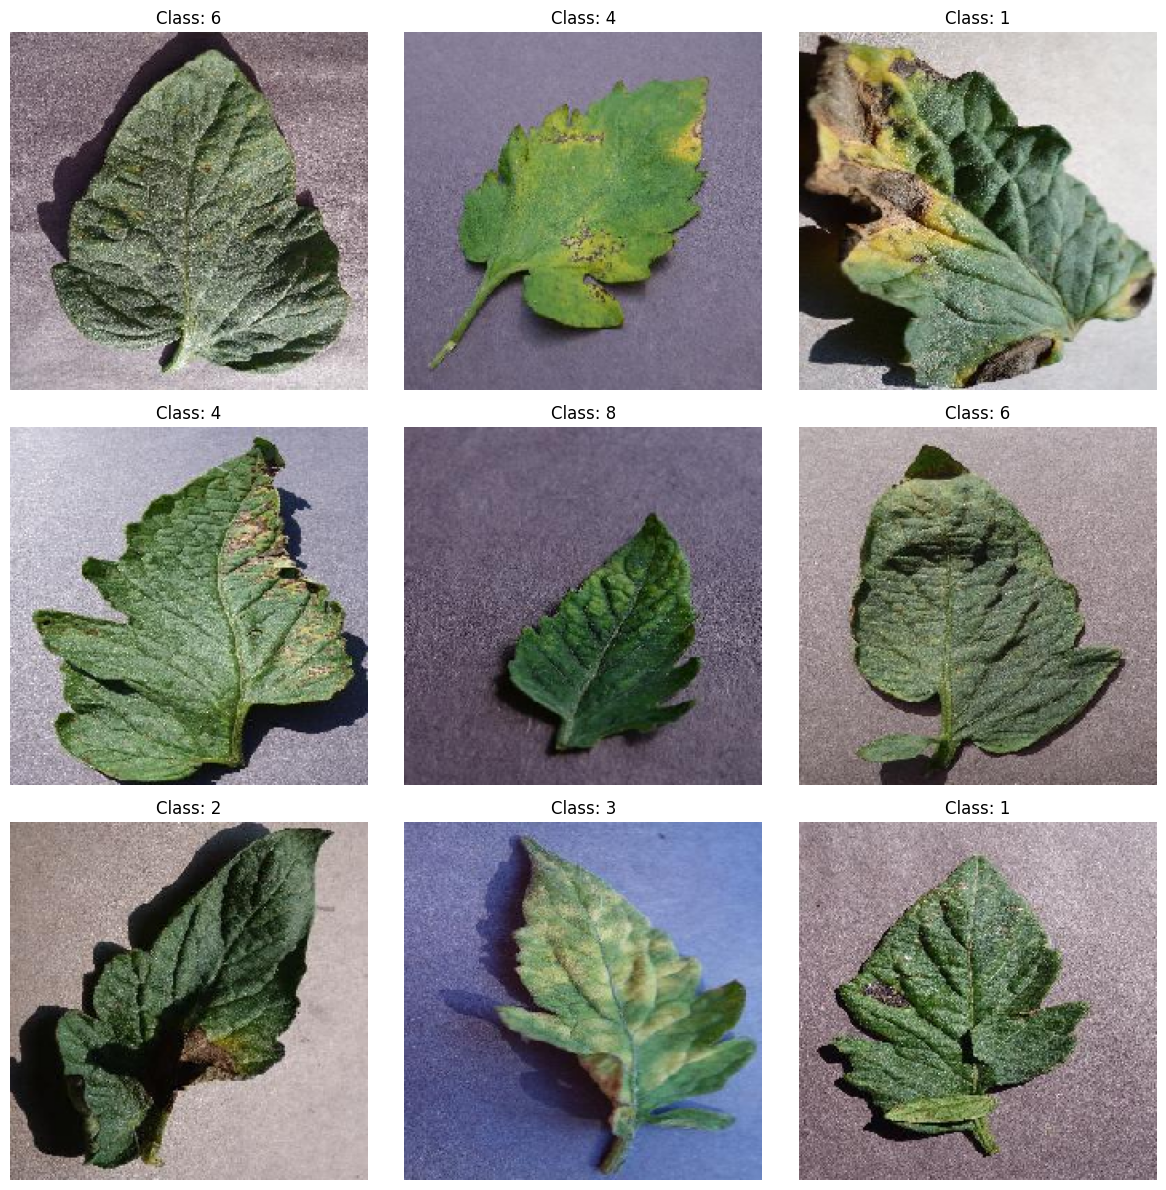

In [17]:
import matplotlib.pyplot as plt

images, labels = next(iter(val_ds))

num_images = 9

plt.figure(figsize=(12, 12))
for i in range(num_images):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"Class: {np.argmax(labels[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()
